In [1]:
import pandas as pd
import sys

sys.path.append('../../')
from src.transform import load_json,transform_diff_avg,transform_diff_experiments
from src.plot_helpers import plot_experiment_range,plot_correlation_matrix,plot_boxplot

indoors_cols = load_json("../../json/locations.json")["wings_indoors"]

In [2]:
df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True)
df_air_indoor = pd.read_csv('../../data/clean_data/airwings.csv',index_col=0,parse_dates=True)

df_air_indoor = df_air_indoor.loc[(df_air_indoor['sensor'] == 'air_wings_indoor') | (df_air_indoor['sensor'] == 'air_wings_indoor_ref'), indoors_cols]

df_air_indoor.rename(columns={'device_id': 'sensor'}, inplace=True)
df_air_indoor['sensor'] = 'AWI_indoor_' + df_air_indoor['sensor'].astype(str)

df_air_indoor

/tmp/ipykernel_1939064/3833256816.py:1: DtypeWarning: Columns (6,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/clean_data/all_sensors.csv',index_col=0,parse_dates=True)


co2     tvoc   co  pm_1.0  pm_2.5  pm_10  \
datetime                                                            
2024-10-16 05:00:43   657.32     0.00  0.5    2.15    2.27   2.24   
2024-10-16 05:01:43   657.32     0.00  0.5    2.15    2.25   2.23   
2024-10-16 05:02:43   657.31     0.00  0.5    2.13    2.24   2.22   
2024-10-16 05:03:43   657.31     0.00  0.5    2.05    2.15   2.13   
2024-10-16 05:04:43   657.31     0.00  0.5    2.00    2.11   2.09   
...                      ...      ...  ...     ...     ...    ...   
2024-10-20 23:36:15  1053.40  1217.67  0.5   36.02   38.17  38.26   
2024-10-20 23:41:15  1054.87  1224.10  0.5   36.10   38.21  38.25   
2024-10-20 23:46:16  1055.30  1226.17  0.5   36.24   38.34  38.35   
2024-10-20 23:51:16  1056.97  1233.67  0.5   36.84   38.96  38.97   
2024-10-20 23:56:17  1060.37  1248.20  0.5   36.93   39.16  39.30   

                     temperature  humidity  pressure            sensor  
datetime                                                                
2024-10-16 05:00:43        26.60      33.0   1010.26    AWI_indoor_2.0  
2024-10-16 05:01:43        26.60      33.0   1010.28    AWI_indoor_2.0  
2024-10-16 05:02:43        26.60      33.0   1010.30    AWI_indoor_2.0  
2024-10-16 05:03:43        26.59      33.0   1010.30    AWI_indoor_2.0  
2024-10-16 05:04:43        26.59      33.0   1010.31    AWI_indoor_2.0  
...                          ...       ...       ...               ...  
2024-10-20 23:36:15        26.49      41.0   1017.03  AWI_indoor_316.0  
2024-10-20 23:41:15        26.49      41.0   1017.02  AWI_indoor_316.0  
2024-10-20 23:46:16        26.48      41.0   1017.05  AWI_indoor_316.0  
2024-10-20 23:51:16        26.46      41.0   1016.99  AWI_indoor_316.0  
2024-10-20 23:56:17        26.45      41.0   1017.04  AWI_indoor_316.0  

[81753 rows x 10 columns]

In [5]:
tvoc_full = pd.concat([df_air_indoor[["tvoc","sensor"]],df[["tvoc","sensor"]]],axis=0)
tvoc_full


tvoc          sensor
datetime                                 
2024-10-16 05:00:43   0.0  AWI_indoor_2.0
2024-10-16 05:01:43   0.0  AWI_indoor_2.0
2024-10-16 05:02:43   0.0  AWI_indoor_2.0
2024-10-16 05:03:43   0.0  AWI_indoor_2.0
2024-10-16 05:04:43   0.0  AWI_indoor_2.0
...                   ...             ...
2024-10-23 13:31:00   NaN      ref_sensor
2024-10-23 13:32:00   NaN      ref_sensor
2024-10-23 13:33:00   NaN      ref_sensor
2024-10-23 13:34:00   NaN      ref_sensor
2024-10-23 13:35:00   NaN      ref_sensor

[660362 rows x 2 columns]

In [6]:
pivot_full = pd.DataFrame()

for col in tvoc_full["sensor"].unique():
    
    pivot_full = pd.concat([pivot_full,tvoc_full.loc[tvoc_full['sensor'] == col].pivot_table(index='datetime', columns='sensor', values='tvoc')],axis=1)

pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17']

sensor               AWI_indoor_2.0  AWI_indoor_3.0  AWI_indoor_4.0  \
datetime                                                              
2024-10-16 05:04:00          0.0000        6.122500          7.5975   
2024-10-16 05:08:00          0.0000        6.852500          7.7000   
2024-10-16 05:12:00          0.0000        6.163333          7.5975   
2024-10-16 05:16:00          0.0000        3.313333          6.4325   
2024-10-16 05:20:00          0.0000        3.580000          6.5400   
...                             ...             ...             ...   
2024-10-20 23:40:00        186.3700      164.510000         99.0400   
2024-10-20 23:44:00        186.3775      164.510000         99.0400   
2024-10-20 23:48:00        186.3875      164.510000         99.0400   
2024-10-20 23:52:00        186.4025      164.510000         99.0400   
2024-10-20 23:56:00        186.4325      164.510000         99.0400   

sensor               AWI_indoor_5.0  AWI_indoor_6.0  AWI_indoor_7.0  \
datetime                                                              
2024-10-16 05:04:00       15.782500         24.2225         28.2525   
2024-10-16 05:08:00       15.072500         23.5725         27.7825   
2024-10-16 05:12:00       13.176667         20.4000         28.5500   
2024-10-16 05:16:00       10.617500         19.8900         29.3175   
2024-10-16 05:20:00       10.772500         19.6750         29.4350   
...                             ...             ...             ...   
2024-10-20 23:40:00      380.230000        172.6600        172.8250   
2024-10-20 23:44:00      374.937500        172.6600        173.0525   
2024-10-20 23:48:00      376.007500        172.6600        173.1100   
2024-10-20 23:52:00      379.417500        172.6600        173.2650   
2024-10-20 23:56:00      381.982500        172.6600        173.4200   

sensor               AWI_indoor_8.0  AWI_indoor_9.0  AWI_indoor_10.0  \
datetime                                                               
2024-10-16 05:04:00         13.5575         13.7650          13.8250   
2024-10-16 05:08:00         11.9025         12.9000          13.3000   
2024-10-16 05:12:00         11.3300         11.7650          11.8825   
2024-10-16 05:16:00         11.7750         11.5425          10.3900   
2024-10-16 05:20:00         11.5250         12.2000          11.1250   
...                             ...             ...              ...   
2024-10-20 23:40:00        154.5800        150.0000         129.9000   
2024-10-20 23:44:00        154.5800        150.0000         129.9000   
2024-10-20 23:48:00        154.5800        150.0000         129.9000   
2024-10-20 23:52:00        154.5800        150.0000         129.9000   
2024-10-20 23:56:00        154.5800        150.0000         129.9000   

sensor               AWI_indoor_11.0  AWI_indoor_12.0  AWI_indoor_13.0  \
datetime                                                                 
2024-10-16 05:04:00          34.9425          13.3925          13.1350   
2024-10-16 05:08:00          33.9400          12.4575          13.0225   
2024-10-16 05:12:00          33.3075          11.4675          12.8175   
2024-10-16 05:16:00          32.1900          11.6075          12.4000   
2024-10-16 05:20:00          29.8600          11.2750          12.7425   
...                              ...              ...              ...   
2024-10-20 23:40:00         160.2800         145.4100         150.1700   
2024-10-20 23:44:00         160.2800         145.4100         150.1700   
2024-10-20 23:48:00         160.2800         145.4100         150.1700   
2024-10-20 23:52:00         160.2800         145.4100         150.1700   
2024-10-20 23:56:00         160.2800         145.4100         150.1700   

sensor               AWI_indoor_14.0  AWI_indoor_15.0  AWI_indoor_316.0  \
datetime                                                                  
2024-10-16 05:04:00          17.0925          11.1325               NaN   
2024-10-16 05:08:00        

### Missing data

In [7]:
pivot_full.resample('240s').mean().isnull().sum()/(len(pivot_full.resample('240s').mean()))

sensor
AWI_indoor_2.0      0.808928
AWI_indoor_3.0      0.787833
AWI_indoor_4.0      0.798312
AWI_indoor_5.0      0.795727
AWI_indoor_6.0      0.797496
AWI_indoor_7.0      0.802667
AWI_indoor_8.0      0.799673
AWI_indoor_9.0      0.792733
AWI_indoor_10.0     0.791508
AWI_indoor_11.0     0.795455
AWI_indoor_12.0     0.804437
AWI_indoor_13.0     0.799809
AWI_indoor_14.0     0.799401
AWI_indoor_15.0     0.796543
AWI_indoor_316.0    0.851932
inbiot              0.804845
LS_168              0.023272
LS_169              0.533478
dtype: float64

## Correlation matrix

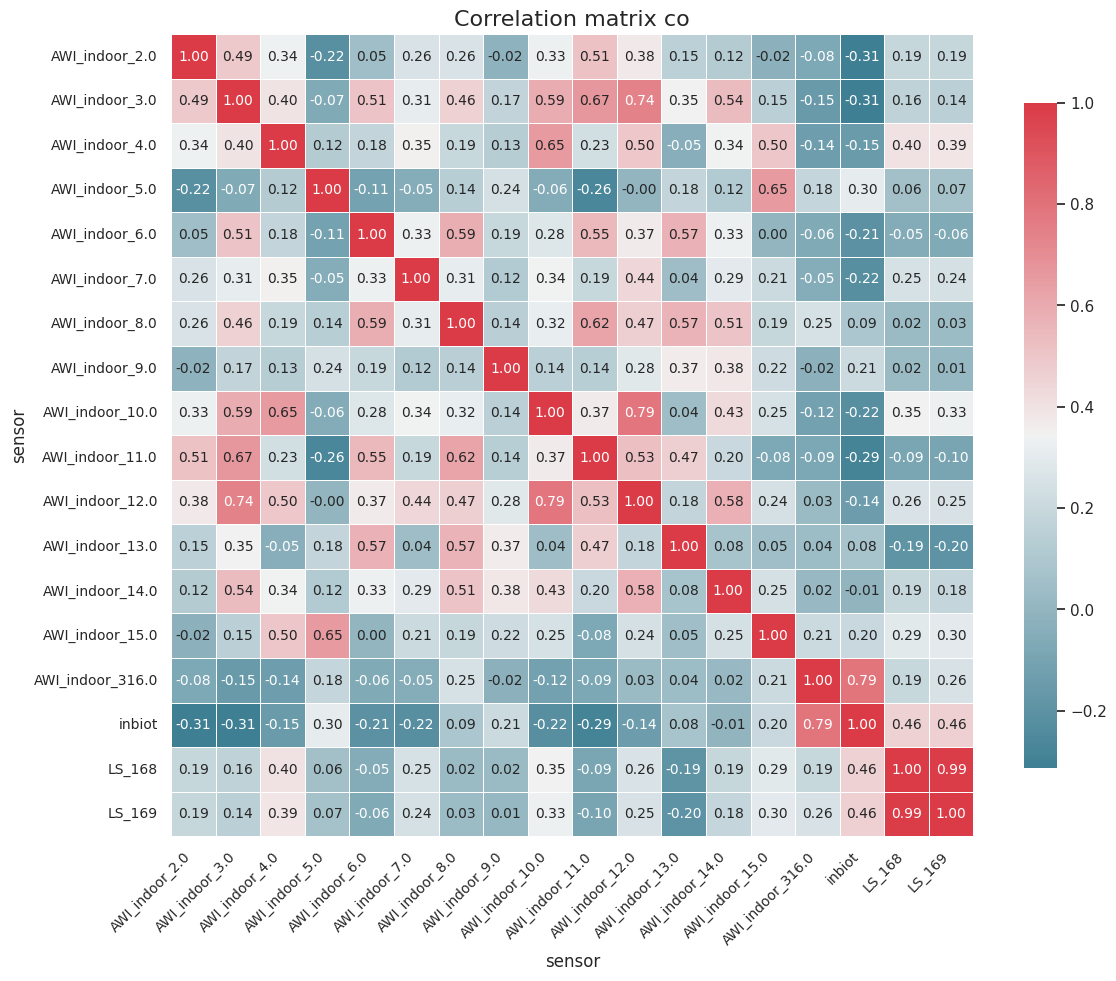

In [8]:
plot_correlation_matrix(pivot_full.resample('240s').mean().corr(),"Correlation matrix co")

## Box plots

In [9]:
plot_boxplot(pivot_full.resample('240s').mean()['2024-10-16 05:00:43':'2024-10-20 23:56:17'],col_names=['AWI_indoor_2.0','AWI_indoor_15.0','AWI_indoor_316.0','LS_168','LS_169'])

In [12]:
diff_df = transform_diff_avg(pivot_full.resample('240s').mean())
diff_df

/home/usr1_tt/collocation_study/notebooks/all_sensors/../../src/transform.py:16: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



Doors opened  Hall opened  Indoor Room Air Exchange  \
sensor                                                                  
AWI_indoor_2.0             NaN          NaN                  0.115139   
AWI_indoor_3.0      -10.139220   -16.338694                 -3.005403   
AWI_indoor_4.0       -2.628410          inf                 -0.681621   
AWI_indoor_5.0       44.190377   -12.943054                -24.342890   
AWI_indoor_6.0      -11.082483   -22.392502                  5.196917   
AWI_indoor_7.0      105.862085          NaN                  4.660865   
AWI_indoor_8.0       -3.772000          inf                -13.022387   
AWI_indoor_9.0        5.093708   -16.516094                 10.495646   
AWI_indoor_10.0       0.417024          inf                  2.286971   
AWI_indoor_11.0      -8.343331          inf                 -2.872750   
AWI_indoor_12.0      -4.772937          inf                  1.824747   
AWI_indoor_13.0            inf   -21.306554                168.646504   
AWI_indoor_14.0      59.766860   102.763814                  4.034801   
AWI_indoor_15.0      39.290001   -13.783875                -19.481567   
AWI_indoor_316.0    -23.971102    -8.715451                -20.798826   
inbiot              -19.392013   -11.333099                -16.655644   
LS_168               -5.440462    -2.666019                 -6.742226   
LS_169               -5.810194    -2.832865                 -6.806514   

                  Rowing CD  Rowing OD  Human Presence  Diffuser (Water)  \
sensor                                                                     
AWI_indoor_2.0    -0.035138  -0.004298   -1.030370e-07          0.000000   
AWI_indoor_3.0     0.043273   0.022376   -3.268292e-01          2.968900   
AWI_indoor_4.0    -0.447987 -18.037053   -1.454805e-01          6.232683   
AWI_indoor_5.0    -0.204129  -4.574156   -5.240818e-01          1.801110   
AWI_indoor_6.0     0.000000  -4.497402   -5.848864e-01          5.311808   
AWI_indoor_7.0    -0.041497  -2.711845   -2.731822e-01         -2.291246   
AWI_indoor_8.0     0.013379  -4.936293   -3.366349e-01          9.171632   
AWI_indoor_9.0    -0.324148  -7.981144   -5.095062e-01          1.822738   
AWI_indoor_10.0   -0.383201 -12.502597   -4.816028e-01          3.541195   
AWI_indoor_11.0    0.187409  -5.643836   -6.342041e-01          3.262977   
AWI_indoor_12.0   -0.153079  -9.124663   -7.349110e-01          2.043866   
AWI_indoor_13.0   -0.205384  -4.208988   -1.201411e-01          5.962185   
AWI_indoor_14.0    0.000000  -5.264084   -3.734918e-01          2.472178   
AWI_indoor_15.0   -0.672985 -12.994724   -4.762733e-01          2.879733   
AWI_indoor_316.0  -0.259302  -0.520231    6.460318e-01         10.068494   
inbiot             0.000000 -25.687187    7.332743e+00         17.142857   
LS_168             0.305512 -13.555807   -5.958787e-01          0.787180   
LS_169             0.361780 -13.335203   -5.756235e-01          0.859031   

                  Diffuser (Oil)    Car (3m)   Car (5m)  Gas Burner (CD)  \
sensor                                                                     
AWI_indoor_2.0         -0.000336   -0.005371   0.002686     1.601589e-07   
AWI_indoor_3.0          2.761287    2.115981  -1.399029     1.072563e+01   
AWI_indoor_4.0          7.129345  265.974564 -13.141326    -1.065612e+00   
AWI_indoor_5.0         -1.844007   40.748632 -10.505848     1.280001e+01   
AWI_indoor_6.0        -13.469046    0.000000   7.946253     0.000000e+00   
AWI_indoor_7.0          0.000000    0.000000   0.982353     0.000000e+00   
AWI_indoor_8.0        -22.768325    0.000000  22.961142     0.000000e+00   
AWI_indoor_9.0          9.165910  -15.288433  -9.768927    -3.380731e-01   
AWI_indoor_10.0        10.676496  113.844396 -16.240275    -1.047379e+00   
AWI_indoor_11.0        -6.675635    0.000000  16.454018     0.000000e+00   
AWI_indoor_12.0        14.900942   55.864104  -7.498253    -3.042239e+00   
AWI_indoor_13.0       -18.744811    0.000000  18

### Correlation matrix for diff DataFrame

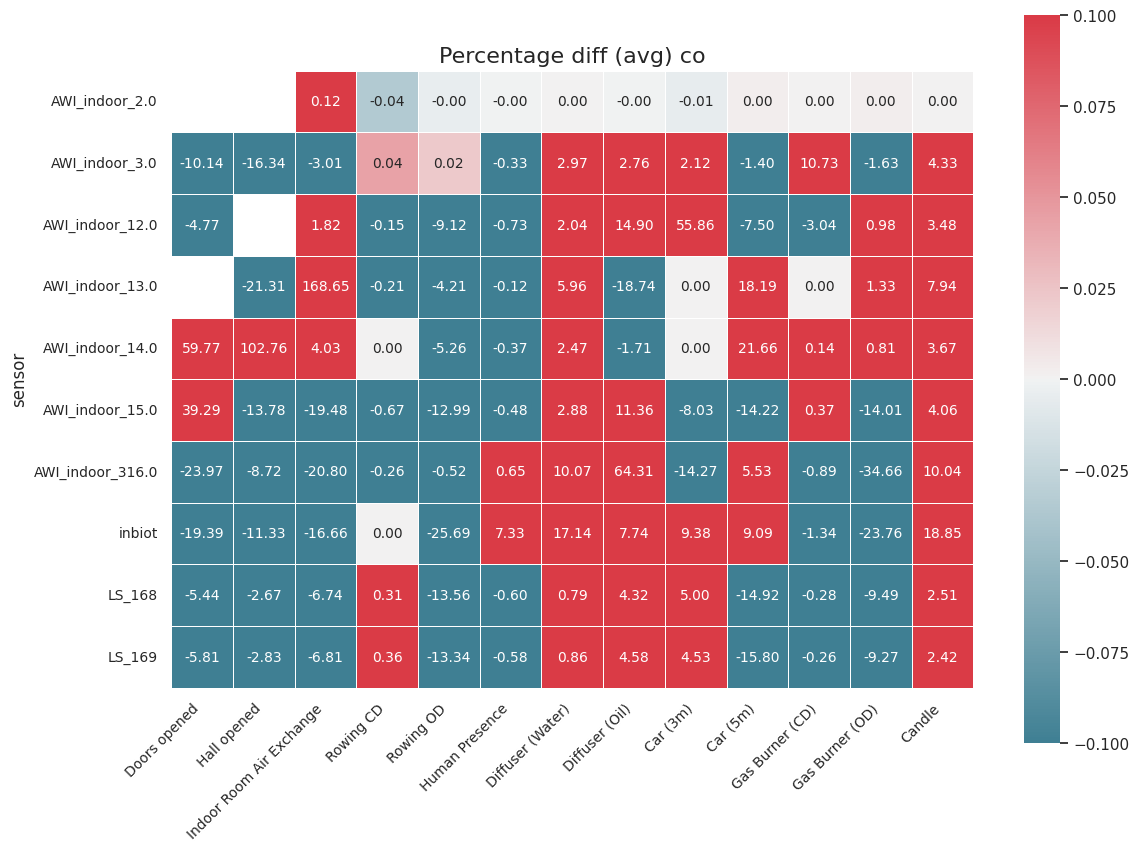

In [13]:
plot_correlation_matrix(diff_df.drop(['AWI_indoor_4.0','AWI_indoor_5.0','AWI_indoor_6.0','AWI_indoor_7.0','AWI_indoor_8.0','AWI_indoor_9.0','AWI_indoor_10.0','AWI_indoor_11.0']),title="Percentage diff (avg) co")

###

In [14]:
df_diff_exp_data = transform_diff_experiments(pivot_full.resample('240s').mean())
df_diff_exp_data

/home/usr1_tt/collocation_study/notebooks/all_sensors/../../src/transform.py:37: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



sensor               AWI_indoor_2.0  AWI_indoor_3.0  AWI_indoor_4.0  \
datetime                                                              
2024-10-16 09:16:00             NaN       -5.467334      -29.926202   
2024-10-16 09:20:00             NaN      -34.048764      -57.273622   
2024-10-16 09:24:00             NaN      -46.442519       46.026261   
2024-10-16 09:28:00             NaN        2.569444       34.406058   
2024-10-16 09:32:00             NaN       -6.721241        0.000000   
...                             ...             ...             ...   
2024-10-20 14:56:00             0.0        4.406556        4.833369   
2024-10-20 15:00:00             0.0        4.198751        8.381085   
2024-10-20 15:04:00             0.0        4.382263        9.863331   
2024-10-20 15:08:00             0.0        3.773710        6.544839   
2024-10-20 15:12:00             0.0        3.298347        7.113405   

sensor               AWI_indoor_5.0  AWI_indoor_6.0  AWI_indoor_7.0  \
datetime                                                              
2024-10-16 09:16:00        0.000000      -27.098799      -15.382903   
2024-10-16 09:20:00      -17.845304      -73.546084      -70.465667   
2024-10-16 09:24:00      -41.946873      -33.174603      -80.304650   
2024-10-16 09:28:00       28.902404       28.266033       58.480326   
2024-10-16 09:32:00        0.000000       26.990741       45.034247   
...                             ...             ...             ...   
2024-10-20 14:56:00        2.560190        6.737987        0.000000   
2024-10-20 15:00:00        1.903729        1.208652        0.000000   
2024-10-20 15:04:00        2.359331      -27.189306        0.000000   
2024-10-20 15:08:00        2.187708      -16.675177        0.000000   
2024-10-20 15:12:00        2.088828       -3.811925        0.000000   

sensor               AWI_indoor_8.0  AWI_indoor_9.0  AWI_indoor_10.0  \
datetime                                                               
2024-10-16 09:16:00        0.000000      -28.128571       -30.716146   
2024-10-16 09:20:00      -23.759892      -75.114291       -56.474347   
2024-10-16 09:24:00      -55.512658       -8.306709       -17.487047   
2024-10-16 09:28:00        1.351544       58.304297         0.000000   
2024-10-16 09:32:00       25.659742       52.256053        21.716379   
...                             ...             ...              ...   
2024-10-20 14:56:00       10.358461        1.405920         3.190786   
2024-10-20 15:00:00       10.339230        3.717494         6.171567   
2024-10-20 15:04:00        0.660164        3.182537         9.149618   
2024-10-20 15:08:00      -36.387806        4.835209         8.084702   
2024-10-20 15:12:00      -15.306375        3.573868         6.045646   

sensor               AWI_indoor_11.0  AWI_indoor_12.0  AWI_indoor_13.0  \
datetime                                                                 
2024-10-16 09:16:00       -21.392313       -28.691681       -18.861789   
2024-10-16 09:20:00       -59.099296       -68.667620       -62.424850   
2024-10-16 09:24:00       -64.527373       -16.523061      -100.000000   
2024-10-16 09:28:00        35.260116        32.442825              inf   
2024-10-16 09:32:00        21.378205        29.737164         0.000000   
...                              ...              ...              ...   
2024-10-20 14:56:00         4.475411         3.842397         7.053218   
2024-10-20 15:00:00         4.209951         3.760859         9.379030   
2024-10-20 15:04:00         5.672418         3.395551         8.346365   
2024-10-20 15:08:00         3.348459         3.770821         7.577212   
2024-10-20 15:12:00         2.749506         3.246963         5.238905   

sensor               AWI_indoor_14.0  AWI_indoor_15.0  AWI_indoor_316.0  \
datetime                                                                  
2024-10-16 09:16:00         0.000000       -28.752719         -2.310302   
2024-10-16 09:20:00       -

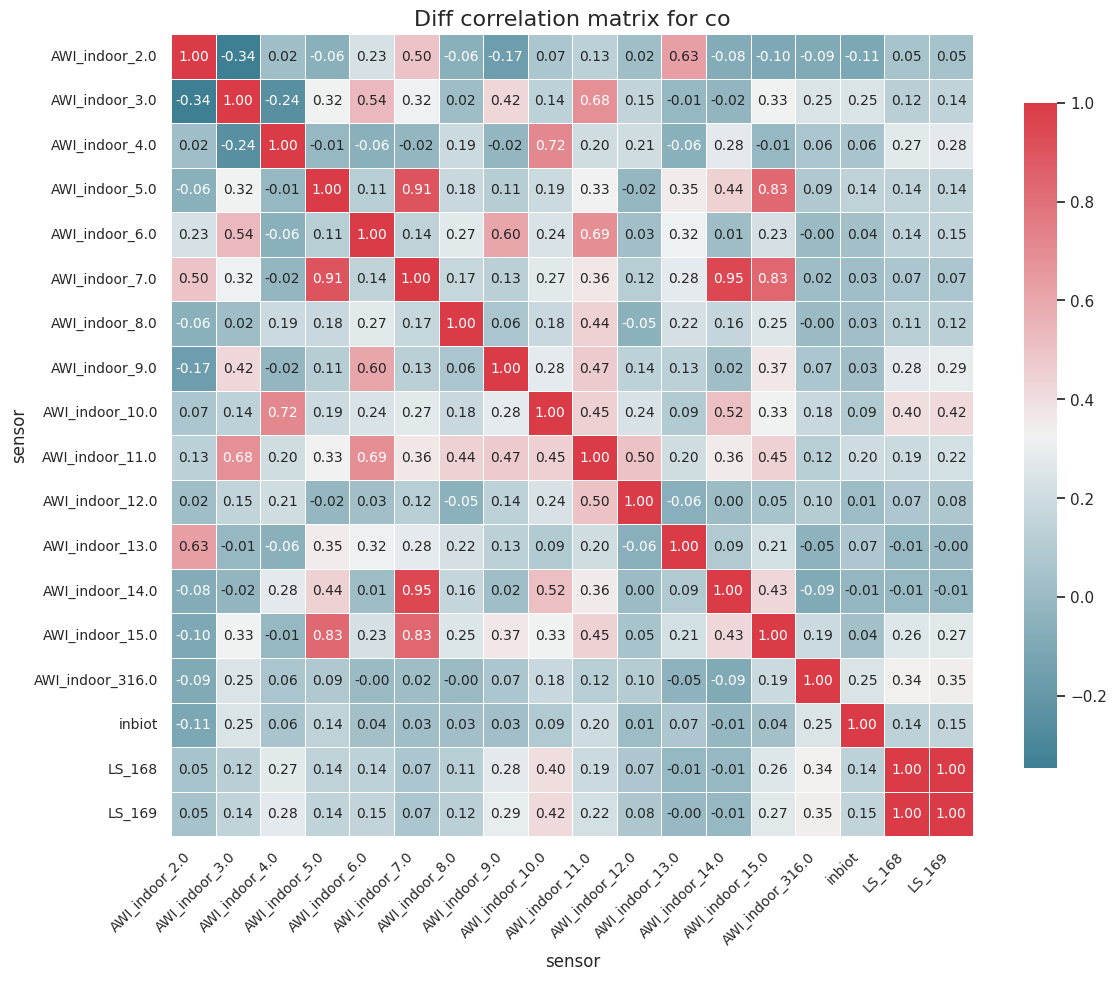

In [15]:
plot_correlation_matrix(df_diff_exp_data.corr(),title="Diff correlation matrix for co")